## Step by step Data Analysis using pandas,numpy,seaborn,maplotlib, Plotly and cufflinks

This is the step by step tutorial(sort of) to get started with data analysis.

It wont be too basic and dont expect it to be a pro notebook also.

The aim is to get you started, if you havent yet. atleast to provide a introduction to some libraries.


#### Thank you for checking out.

### Import the all important libraries


In [136]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

%matplotlib inline

In [137]:
#Read the dataset into the variable(DataFrame)
pokemon = pd.read_csv('Pokemon.csv')

It is good habbit to have a good look at the data in the beginning itself so that we can plan our process

In [17]:
#Just have the idea about the dataset 
pokemon.head()

# we can see all the different coluimns and we can also see that one pokemon has type 2 value missing
#lets investigate further

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation Legendary  
0       65       65     45           1     False  
1       80       80     60           1     False  
2      100      100     80           1     False  
3      122      120     80           1     False  
4       60       50     65           1     False

In [18]:
#Check the datatype and number of columns
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


We can see here that type 2 column has only 414 values , and thats okay because we know that not every pokemon can have more than one types .

In [19]:
pokemon.describe()

#      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%     50.000000   45.000000     2.00000  
50%     70.000000   65.000000     3.00000  
75%     90.000000   90.000000     5.00000  
max    230.000000  180.000000     6.00000

In [20]:
#we can see the maximum , minimum, mean, std.... all the value and can have some idea about the range of the all numerical fields

## EDA
### Lets start plotting some plots 
#### But let me first show you the power of plotly

In [22]:
pokemon[['Speed','Total']].iplot(kind='spread')

### Move your cursor over the plot or select some part on the plot to zoom in and then double click to zoomout
Such interactive plots can be achieved with the help of plotly 

### Okay now lets start the analysis

In [23]:
sns.set_style('whitegrid')

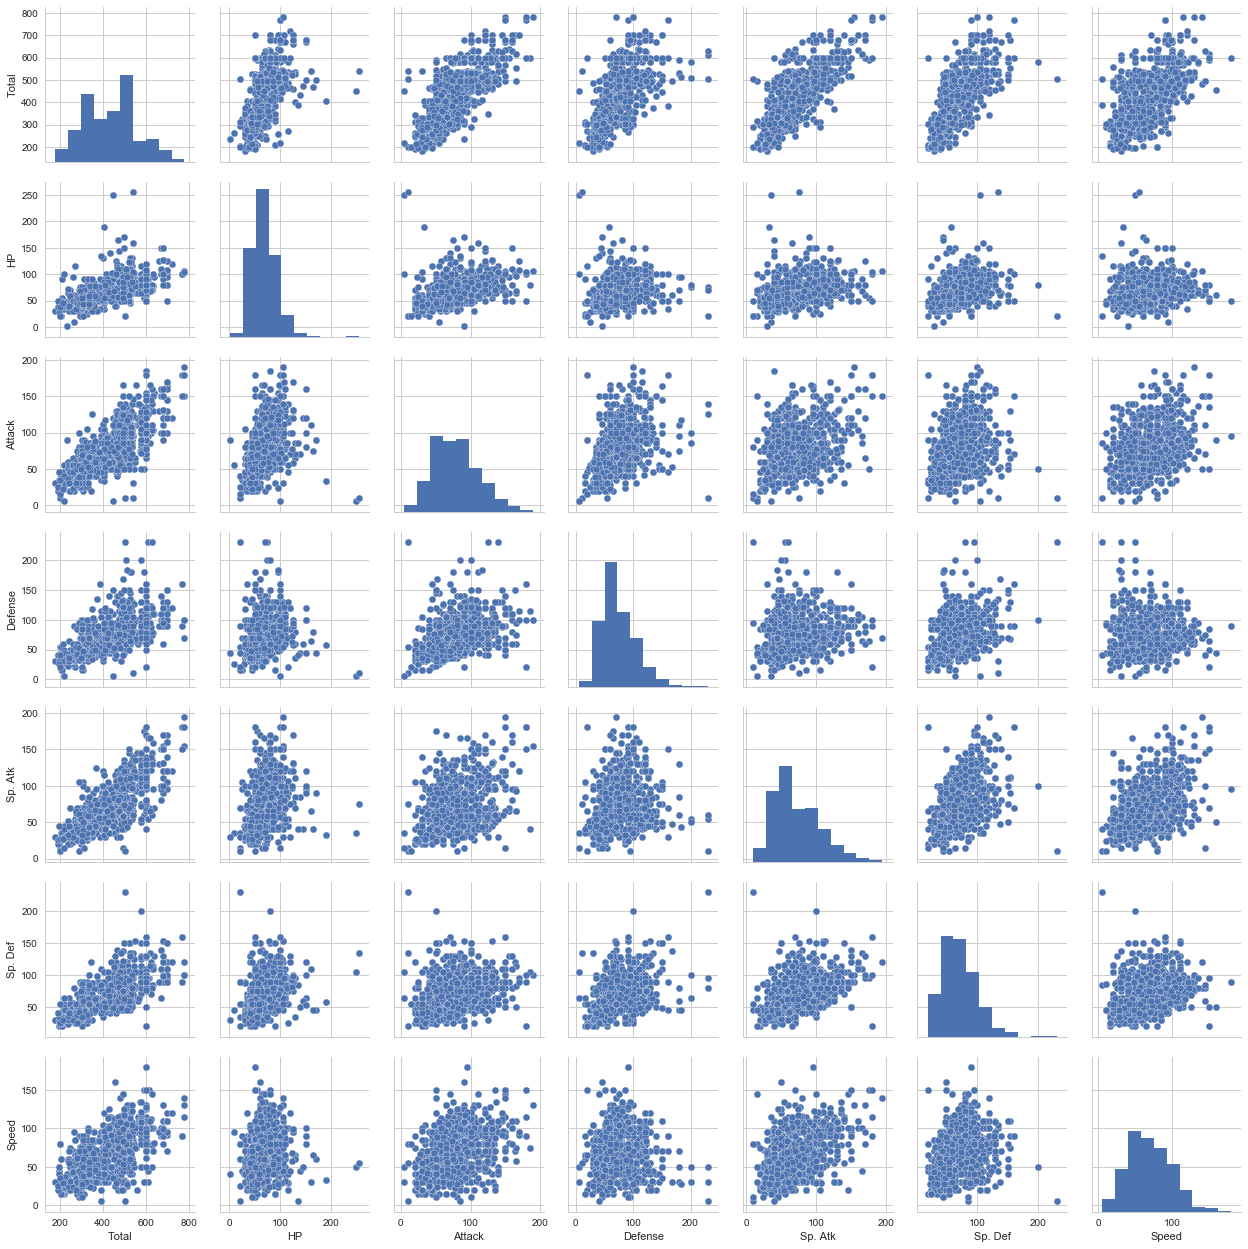

In [27]:
sns.pairplot(data=pokemon.drop(['Name','Type 1','Type 2','Legendary','Generation','#'],axis=1),palette='rainbow')

### Here we can see the relation between all the numerical fields
but this is does not give a clear picture
lets try with adding the hue parameter

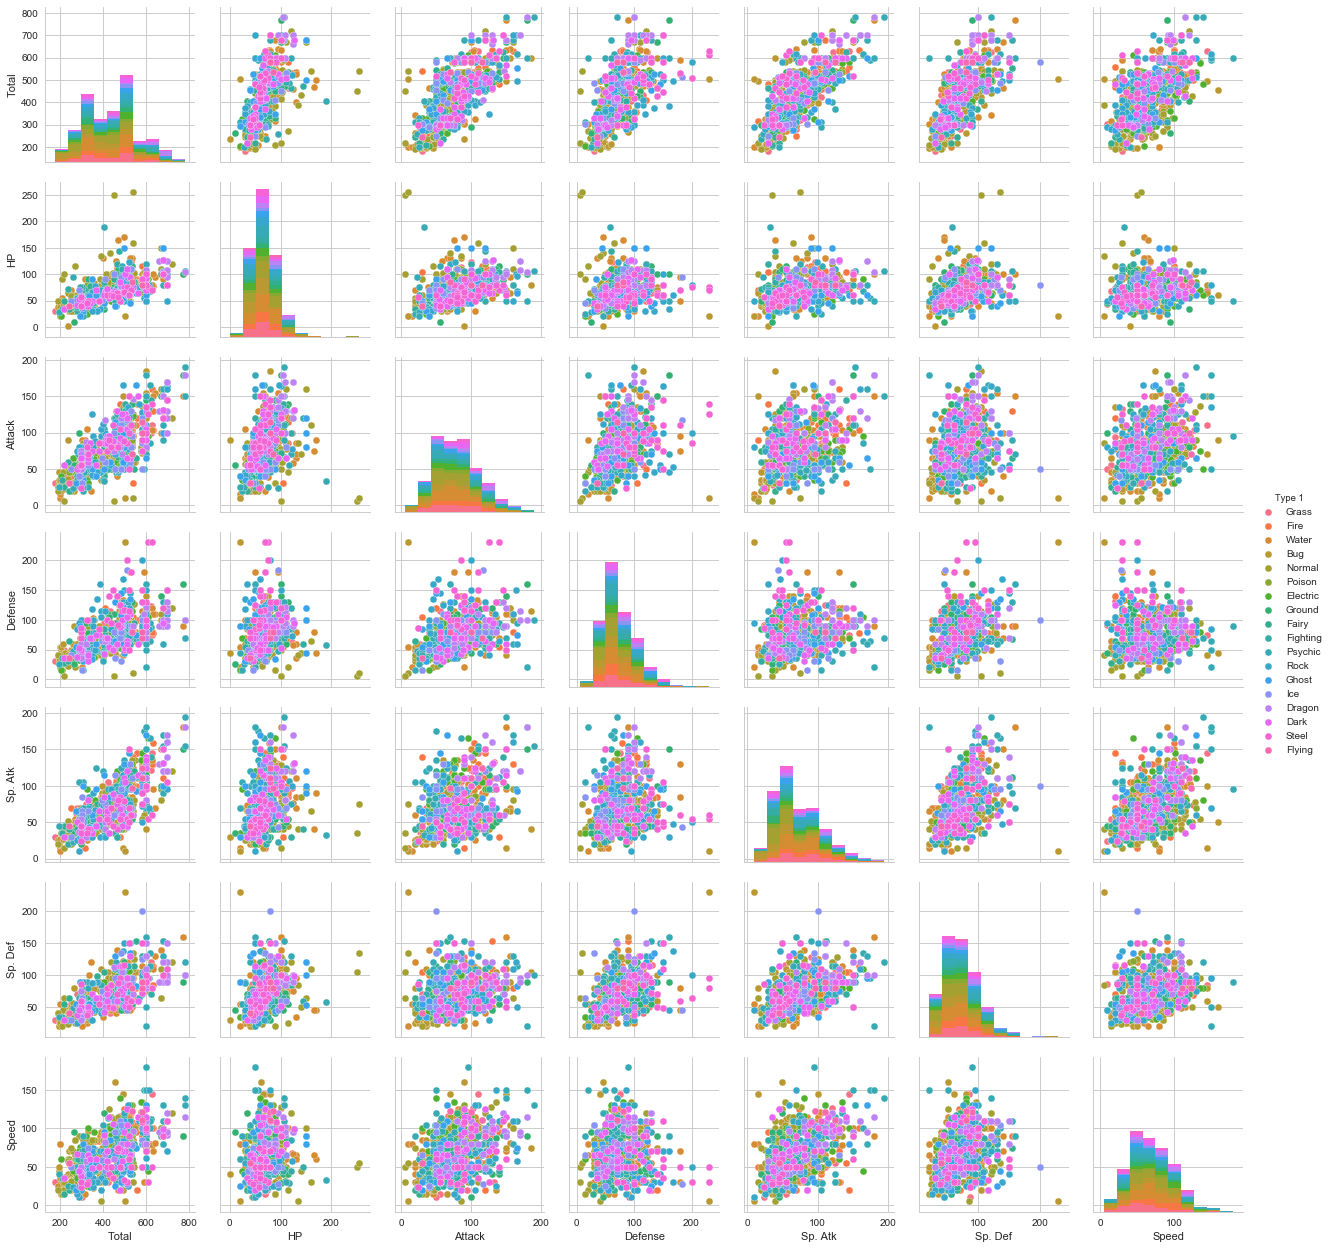

In [63]:
sns.pairplot(data=pokemon.drop(['Name','Type 2','Legendary','Generation','#'],axis=1),hue='Type 1')

Okay this is fine lets go and check someother method to get more clearinformation

### Groupby
we can use groupby function to look for the aggregate values for each type 1

In [131]:
#Here i am dropping some of the columns which i might not need now
pkmn_num = data=pokemon.drop(['Name','Type 2','Legendary','Generation','#'],axis=1)
p_mean = pkmn_num.groupby('Type 1').mean()
p_mean

Total         HP      Attack     Defense    Sp. Atk    Sp. Def  \
Type 1                                                                          
Bug       378.927536  56.884058   70.971014   70.724638  53.869565  64.797101   
Dark      445.741935  66.806452   88.387097   70.225806  74.645161  69.516129   
Dragon    550.531250  83.312500  112.125000   86.375000  96.843750  88.843750   
Electric  443.409091  59.795455   69.090909   66.295455  90.022727  73.704545   
Fairy     413.176471  74.117647   61.529412   65.705882  78.529412  84.705882   
Fighting  416.444444  69.851852   96.777778   65.925926  53.111111  64.703704   
Fire      458.076923  69.903846   84.769231   67.769231  88.980769  72.211538   
Flying    485.000000  70.750000   78.750000   66.250000  94.250000  72.500000   
Ghost     439.562500  64.437500   73.781250   81.187500  79.343750  76.468750   
Grass     421.142857  67.271429   73.214286   70.800000  77.500000  70.428571   
Ground    437.500000  73.781250   95.750000   84.843750  56.468750  62.750000   
Ice       433.458333  72.000000   72.750000   71.416667  77.541667  76.291667   
Normal    401.683673  77.275510   73.469388   59.846939  55.816327  63.724490   
Poison    399.142857  67.250000   74.678571   68.821429  60.428571  64.392857   
Psychic   475.947368  70.631579   71.456140   67.684211  98.403509  86.280702   
Rock      453.750000  65.363636   92.863636  100.795455  63.340909  75.477273   
Steel     487.703704  65.222222   92.703704  126.370370  67.518519  80.629630   
Water     430.455357  72.062500   74.151786   72.946429  74.812500  70.517857   

               Speed  
Type 1                
Bug        61.681159  
Dark       76.161290  
Dragon     83.031250  
Electric   84.500000  
Fairy      48.588235  
Fighting   66.074074  
Fire       74.442308  
Flying    102.500000  
Ghost      64.343750  
Grass      61.928571  
Ground     63.906250  
Ice        63.458333  
Normal     71.551020  
Poison     63.571429  
Psychic    81.491228  
Rock       55.909091  
Steel      55.259259  
Water      65.964286

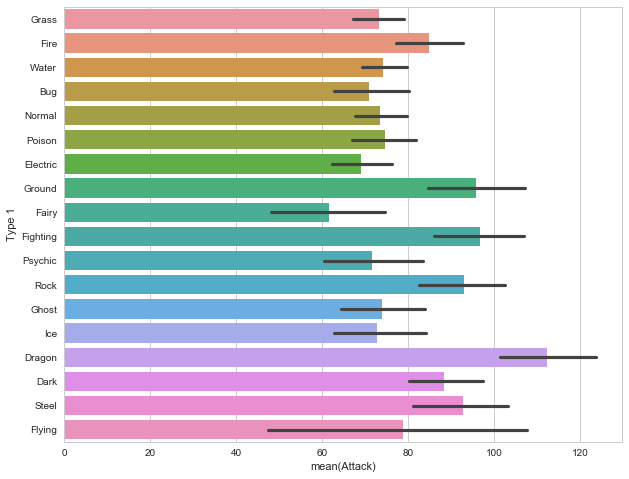

In [77]:
plt.figure(figsize=(10,8))
sns.barplot(y='Type 1',x='Attack',data=pkmn_num)

Here we can see that dragon pokemon has high mean value for attack and Fairy has the least

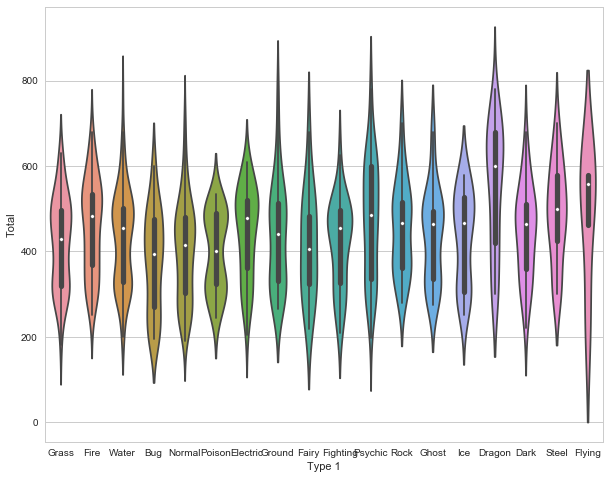

In [138]:
plt.figure(figsize=(10,8))# this lets us set the size of the figure(atleast for this notebook)
sns.violinplot(x='Type 1',y='Total',data =pkmn_num)


Well this looks nice but x axis values(type 1)doesnot look good, there are values which are overlapping each other.
we can use tight layout method to fix this problem

Lets check violin and swarmplot

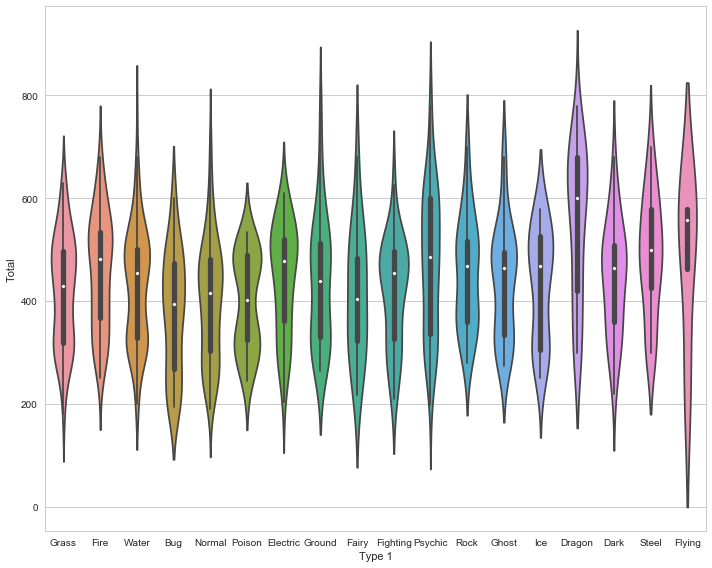

In [86]:

plt.figure(figsize=(10,8))
sns.violinplot(x='Type 1',y='Total',data =pkmn_num)
plt.tight_layout()

Yes now it looks good

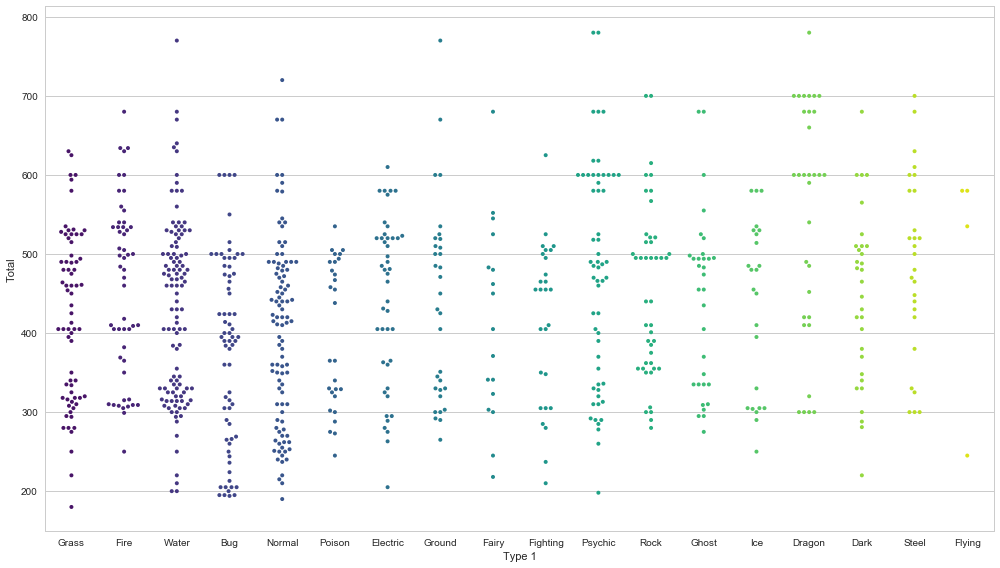

In [93]:
plt.figure(figsize=(14,8))
sns.swarmplot(x='Type 1',y='Total',data =pkmn_num,palette='viridis',size=4)
plt.tight_layout()

now lets try putting these two plot together

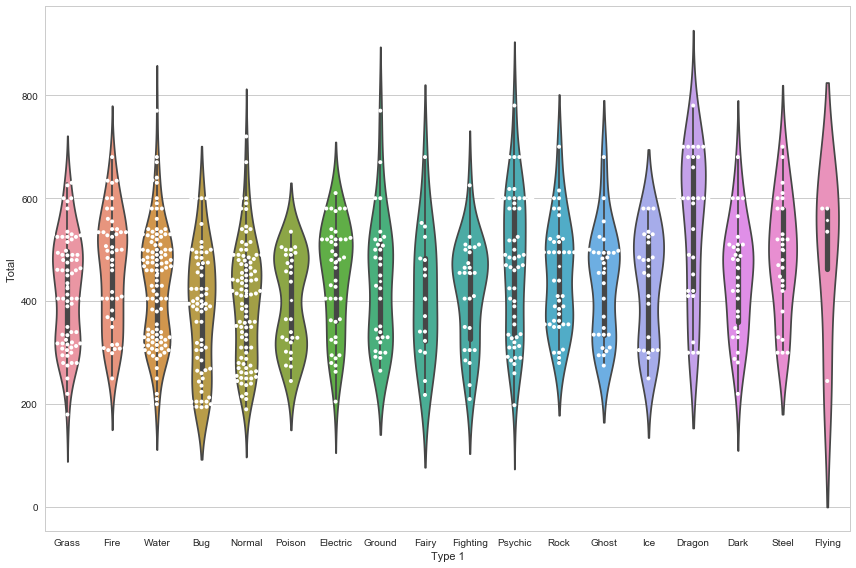

In [97]:
plt.figure(figsize=(12,8))
sns.violinplot(x='Type 1',y='Total',data =pkmn_num)
sns.swarmplot(x='Type 1',y='Total',data =pkmn_num,color='white',size=4)
plt.tight_layout()

### lets categorize pokemon on the basis of the mean of total column
Lets make a column to check whether the given pokemon has the 'total' column value above the mean value of that column or not

we will use apply function for that.

Apply function allows us to apply function on the columns(sounds confusing as well as interesting) . they are very helpful in many scenarios and we can write our own functions, and implement complex logics also

Below example might clear things out.

In [133]:
# creating a new column as 'Abv_avg' and assigning it values 
pkmn_num['Abv_avg'] = pkmn_num['Total'].apply(lambda x : x>pkmn_num['Total'].mean() )

In [ ]:
#The above logic could be implemented this way also
#************************************************
'''
avg = pkmn_num['Total'].mean()
def abv(col):
    if col> avg:
        return True
    return False
pkmn_num['Abv_avg'] = pkmn_num['Total'].apply(abv)
'''
#**************************************************

#But right now lambda will be just fine, since we dont need to implement any complex logic



In [135]:
pkmn_num.head()

Type 1  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed Abv_avg
0  Grass    318  45      49       49       65       65     45   False
1  Grass    405  60      62       63       80       80     60   False
2  Grass    525  80      82       83      100      100     80    True
3  Grass    625  80     100      123      122      120     80    True
4   Fire    309  39      52       43       60       50     65   False

#### Now lets use this column for plotting 

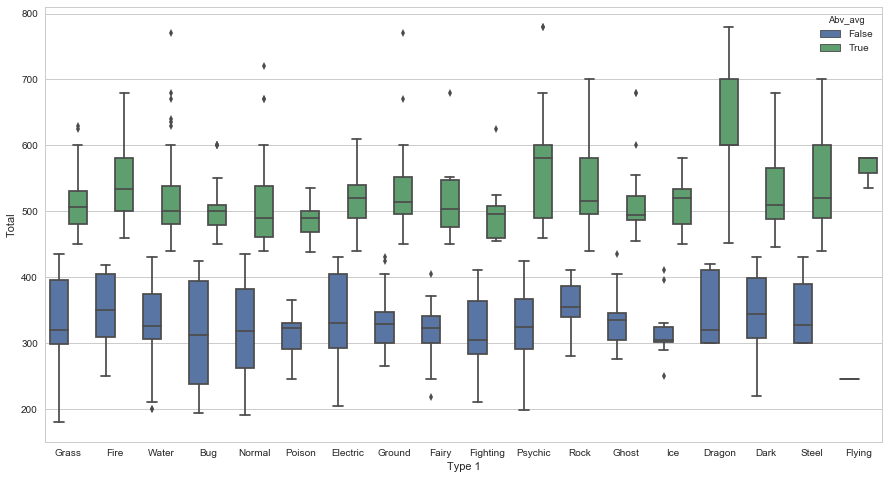

In [116]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Type 1',y='Total',data=pkmn_num,hue='Abv_avg')

### Here we can see that mostly flying pokemon are above average 
Earlier we saw that dragon pokemon are more attacking than anyone and now we can see that flying pokemon are generally above average.

So next time if you go catching pokemon, try looking for flying dragon pokemon(atleast thats what i would do).
but maybe you like less attacking pokemon and more defensive pokemon

I would recommend you to go and try something different , maybe you will find something more interesting

## Now lets chevk out some cool and interactive plots with plotly and cufflinks
#### They are very easy to plot , you have to just take your dataframe and use 'iplot' on it and then provide the kind of plot

In [125]:
pkmn_num.drop(['Type 1','Total'],axis=1).iplot(kind='box')

In [130]:
#lets look at one more interesting plot
pk3d = pd.DataFrame({'x':pkmn_num['Attack'][0:5],'y':pkmn_num['Defense'][0:5],'z':pkmn_num['Speed'][0:5]})
pk3d.iplot(kind='surface')

You can drag this 3d figure and play with it.

### Thank you for following, I hope this helped you